In [2]:
import pandas as pd
df = pd.read_csv("features/extracted_features_selected.csv")

In [3]:
# --- Train-Test Split & Feature Scaling---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and labels
X = df.drop("emotion", axis=1)
y = df["emotion"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# --- SVM ---
# --- Extended Hyperparameter grid ---
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Smaller parameter grid for faster testing
param_grid = {
    'C': [0.1, 1, 10],                  # Regularization strength
    'gamma': ['scale', 0.01, 0.1],      # Only for RBF kernel
    'kernel': ['linear', 'rbf']         # Linear and RBF kernels
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# Evaluate on the test set
y_pred_best = grid.predict(X_test_scaled)

results_best = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best, average='weighted'),
    "Recall": recall_score(y_test, y_pred_best, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_best, average='weighted')
}

print("Test set evaluation with best parameters:")
print(results_best)

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validated accuracy: 0.5902653867871259
Test set evaluation with best parameters:
{'Accuracy': 0.5833333333333334, 'Precision': np.float64(0.6054216687897244), 'Recall': np.float64(0.5833333333333334), 'F1-score': np.float64(0.5901413234642401)}


In [6]:
# --- Logistic Regression--
# --- Extended Hyperparameter grid ---
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l2'],                       # 'l2' works with lbfgs and multinomial
    'solver': ['lbfgs', 'saga'],             # solvers that support multinomial
    'multi_class': ['multinomial'],          # multi-class strategy
    'class_weight': [None, 'balanced']       # handle class imbalance
}

# Grid search with 5-fold cross-validation
grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

# Best hyperparameters and cross-validated accuracy
print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# Evaluate on test set
y_pred_best = grid.predict(X_test_scaled)

results_best = {
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best, average='weighted'),
    "Recall": recall_score(y_test, y_pred_best, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_best, average='weighted')
}

print("Test set evaluation with best parameters:")
print(results_best)

Best parameters: {'C': 1, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.5338565782044042
Test set evaluation with best parameters:
{'Accuracy': 0.5138888888888888, 'Precision': np.float64(0.5306519787542704), 'Recall': np.float64(0.5138888888888888), 'F1-score': np.float64(0.5145427554449732)}


C:\Users\Krystal Bacalso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [5]:
# --- SVM Modeling---
svm_rbf = SVC(kernel='rbf',  
              C=10,
              gamma=0.01,
              random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

In [7]:
# --- Logistic Regression Modeling---
logreg = LogisticRegression(
    C=1,
    class_weight=None,
    multi_class='multinomial',
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
logreg.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred_lr = logreg.predict(X_test_scaled)

C:\Users\Krystal Bacalso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
# --- Model Comparison ---
def evaluate_model(y_true, y_pred_lr):
    return {
        "Accuracy": accuracy_score(y_true, y_pred_lr),
        "Precision": precision_score(y_true, y_pred_lr, average='weighted'),
        "Recall": recall_score(y_true, y_pred_lr, average='weighted'),
        "F1-score": f1_score(y_true, y_pred_lr, average='weighted')
    }

results_logreg = pd.DataFrame({
    "Logistic Regression": evaluate_model(y_test, y_pred_lr),
    "RBF SVM": evaluate_model(y_test, y_pred_rbf)
}).T

print("Evaluation Table for Logistic Regression:")
print(results_logreg)

Evaluation Table for Logistic Regression:
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.506944   0.508836  0.506944  0.506175
RBF SVM              0.565972   0.585929  0.565972  0.572311


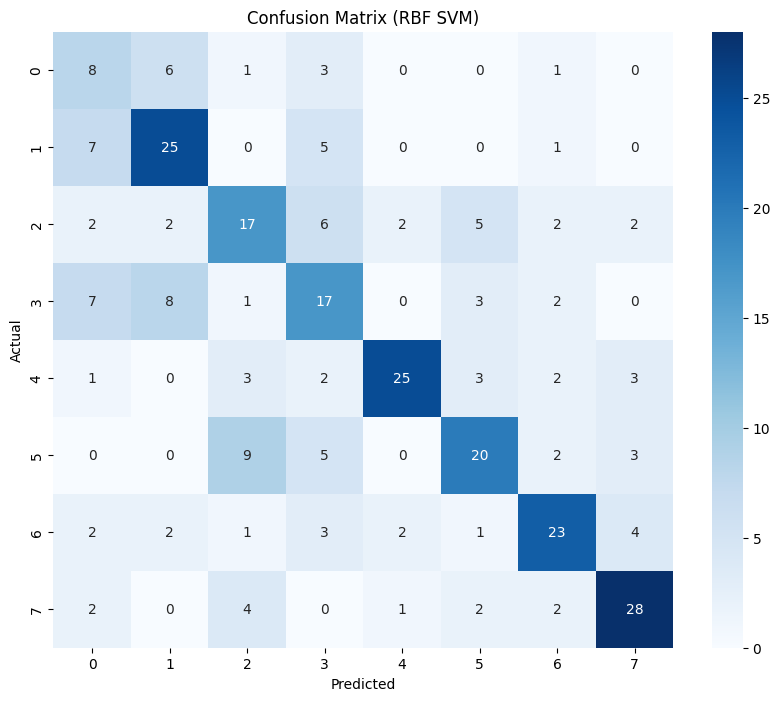

In [9]:
# --- Confusion Matrix for RBF SVM---
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rbf)  
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (RBF SVM)")
plt.show()

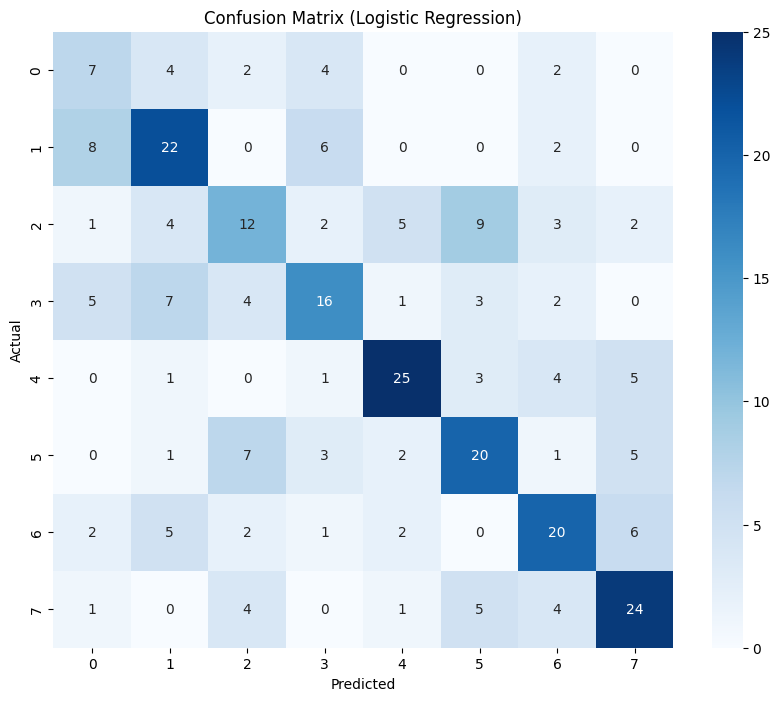

In [10]:
# --- Confusion Matrix for Logistic Regression---
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr) 
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

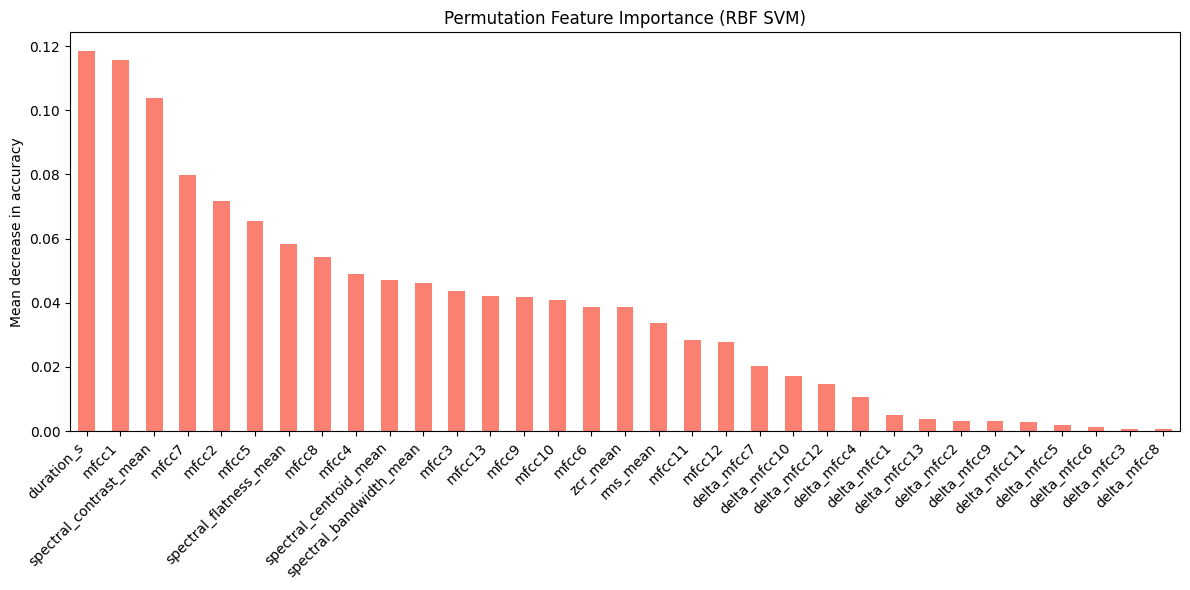

In [11]:
# --- Feature Importance using Permutation Importance for RBF SVM---
from sklearn.inspection import permutation_importance

result = permutation_importance(svm_rbf, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Convert to DataFrame
import pandas as pd
feature_importance = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar', color='salmon')
plt.title("Permutation Feature Importance (RBF SVM)")
plt.ylabel("Mean decrease in accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

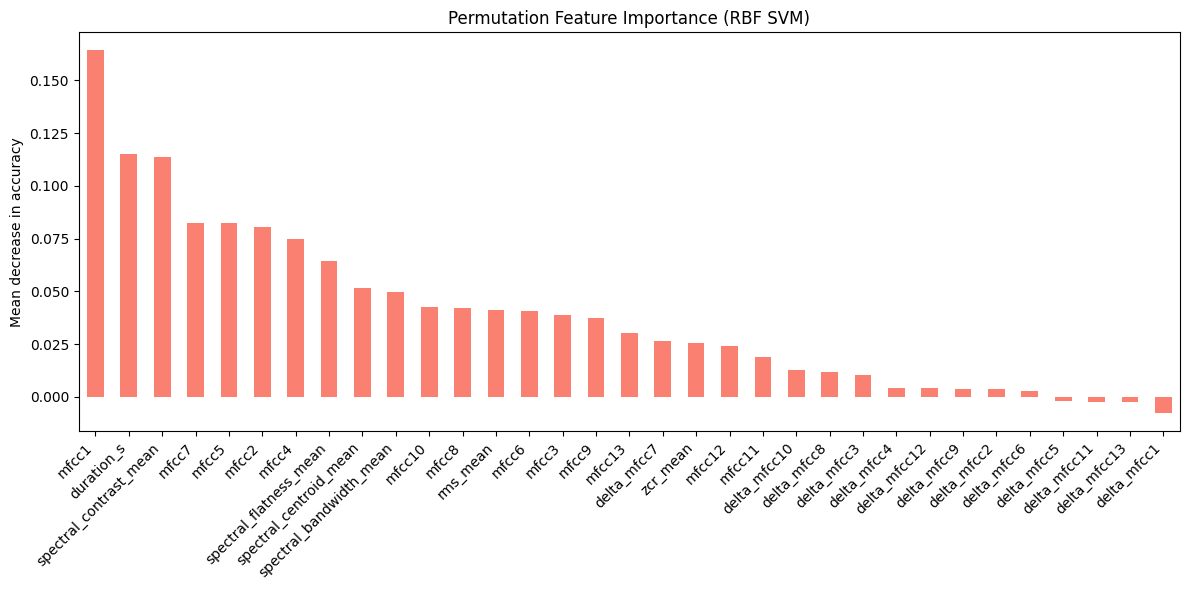

In [12]:
# --- Feature Importance using Permutation Importance for Logistic Regression--
from sklearn.inspection import permutation_importance

result = permutation_importance(logreg, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Convert to DataFrame
import pandas as pd
feature_importance = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar', color='salmon')
plt.title("Permutation Feature Importance (RBF SVM)")
plt.ylabel("Mean decrease in accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
import sounddevice as sd
import soundfile as sf

fs = 16000  # RAVDESS sample rate
duration = 3  # seconds

print("Recording...")
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()
sf.write("my_voice.wav", audio, fs)
print("Saved as my_voice.wav")

Recording...
Saved as my_voice.wav


In [16]:
from python.feature_extraction_selected import extract_features
# Mapping numeric emotion IDs to readable labels
emotion_mapping = {
    1: "neutral",
    2: "calm",
    3: "happy",
    4: "sad",
    5: "angry",
    6: "fearful",
    7: "disgust",
    8: "surprised"
}

def predict_emotion(audio_path, model, scaler):
    features = extract_features(audio_path).reshape(1, -1)
    features_scaled = scaler.transform(features)
    pred_id = model.predict(features_scaled)[0]
    return emotion_mapping.get(pred_id, "Unknown")

# -------------------------
audio_path = "my_voice.wav"

predicted_logreg = predict_emotion(audio_path, logreg, scaler)
print("Predicted emotion (Logistic Regression):", predicted_logreg)

predicted_svm = predict_emotion(audio_path, svm_rbf, scaler)
print("Predicted emotion (RBF SVM):", predicted_svm)
 

Loaded existing features from features/extracted_features_selected.csv
Predicted emotion (Logistic Regression): angry
Predicted emotion (RBF SVM): fearful


C:\Users\Krystal Bacalso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Krystal Bacalso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
